In [78]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

cancer = datasets.load_breast_cancer()
x = cancer.data
y = cancer.target
x_std = StandardScaler().fit_transform(x)
pca = PCA(n_components=2)
pca.fit(x_std)
x_reduction = pca.transform(x_std)

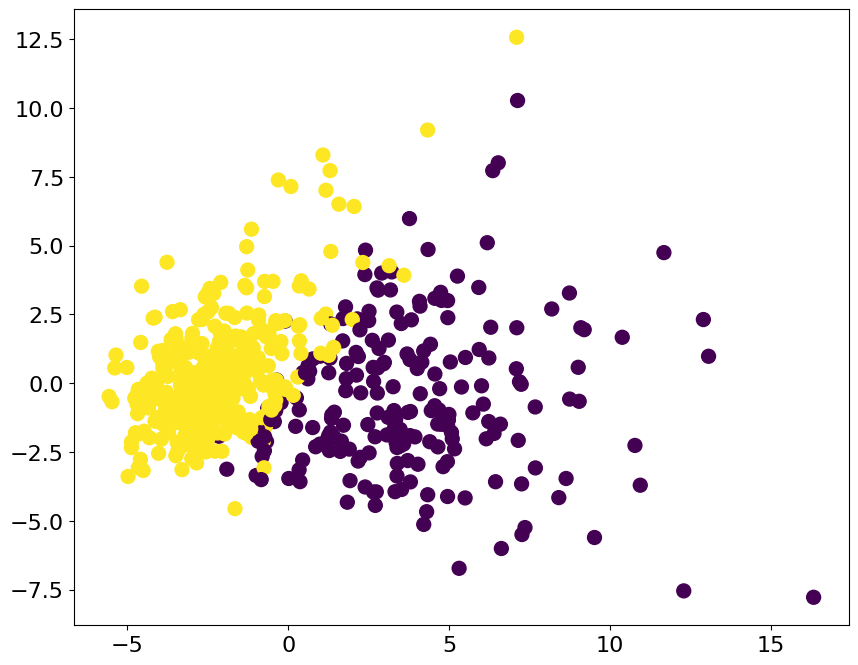

In [79]:
import matplotlib.pyplot as plt

def plot_pca(x_std, y):
    plt.figure(figsize=(10, 8))
    plt.scatter(x_std[:, 0], x_std[:, 1], c=y, s=100)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()
    
plot_pca(x_reduction, y)

In [80]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(x_reduction)
x_standard = standardScaler.transform(x_reduction)

In [81]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C=1e9)
svc.fit(x_standard, y)
print(svc.score(x_standard, y))

0.9578207381370826


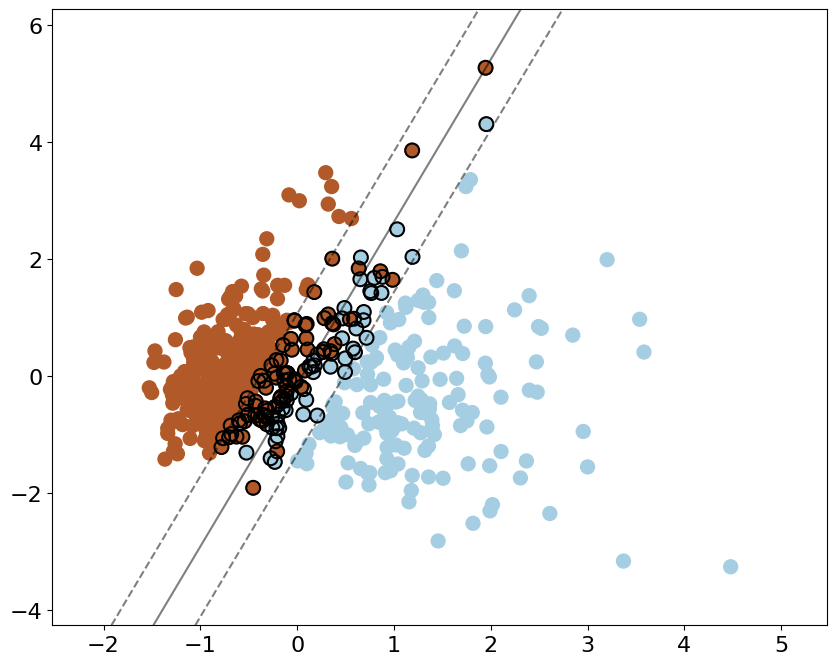

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import LinearSVC

def plot_svm_boundary(svc, X, y):
    plt.figure(figsize=(10, 8))
    DecisionBoundaryDisplay.from_estimator(
        svc,
        X,
        plot_method="contour",
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
        ax=plt.gca()
    )
    
    plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=plt.cm.Paired)

    if hasattr(svc, 'coef_'):
        decision_function = svc.decision_function(X)
        support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
        support_vectors = X[support_vector_indices]
        plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
                    s=100, facecolors='none', edgecolors='k', linewidths=1.5,
                    label='Support Vectors')
    
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()

plot_svm_boundary(svc, x_standard, y)

0.9314586994727593


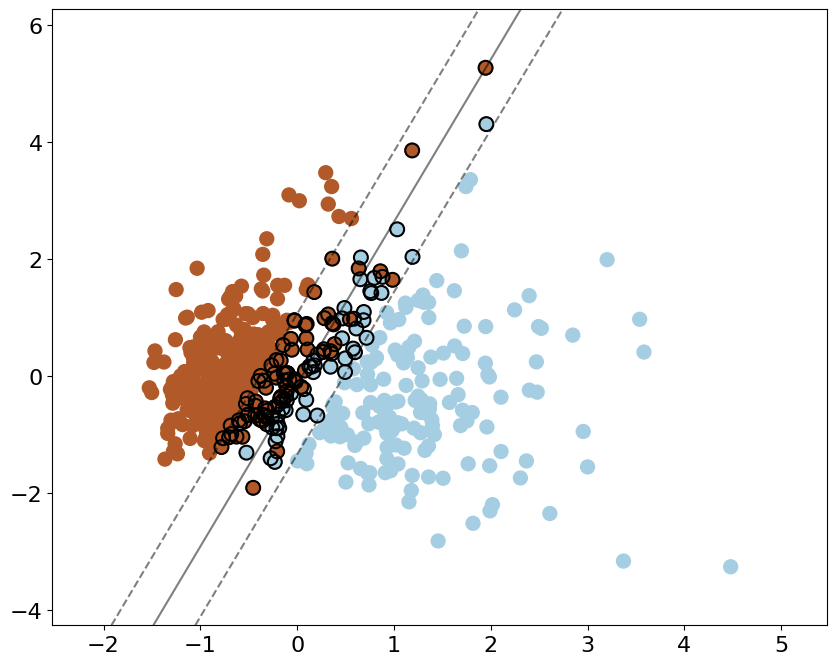

In [84]:
svc2 = LinearSVC(C=0.01)
svc2.fit(x_standard, y)
print(svc2.score(x_standard, y))
plot_svm_boundary(svc, x_standard, y)

(100, 2)
(100,)


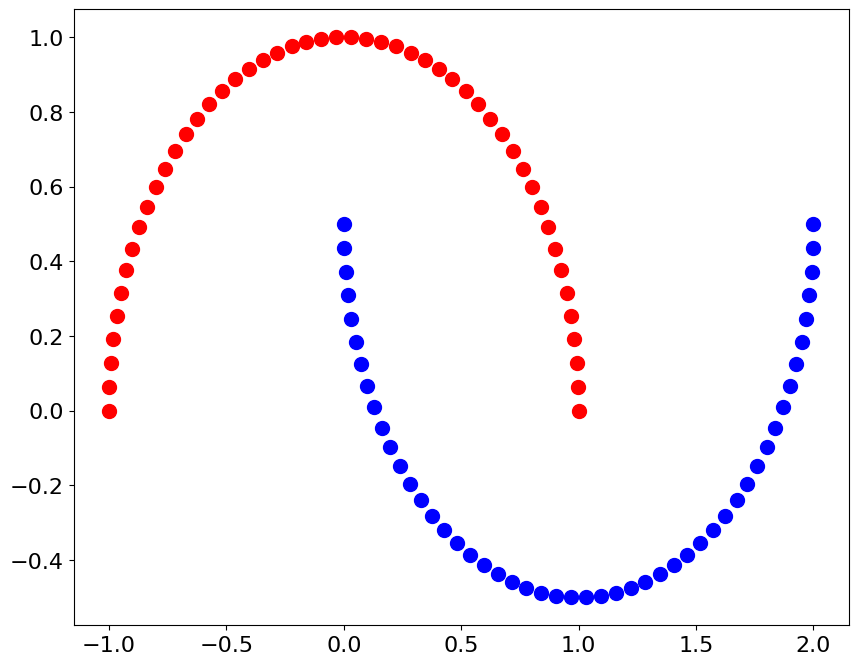

In [124]:
x, y = datasets.make_moons()
print(x.shape)
print(y.shape)
plt.figure(figsize=(10, 8))
plt.scatter(x[y==0,0],x[y==0,1], color='red', s=100)
plt.scatter(x[y==1,0],x[y==1,1], color='blue', s=100)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

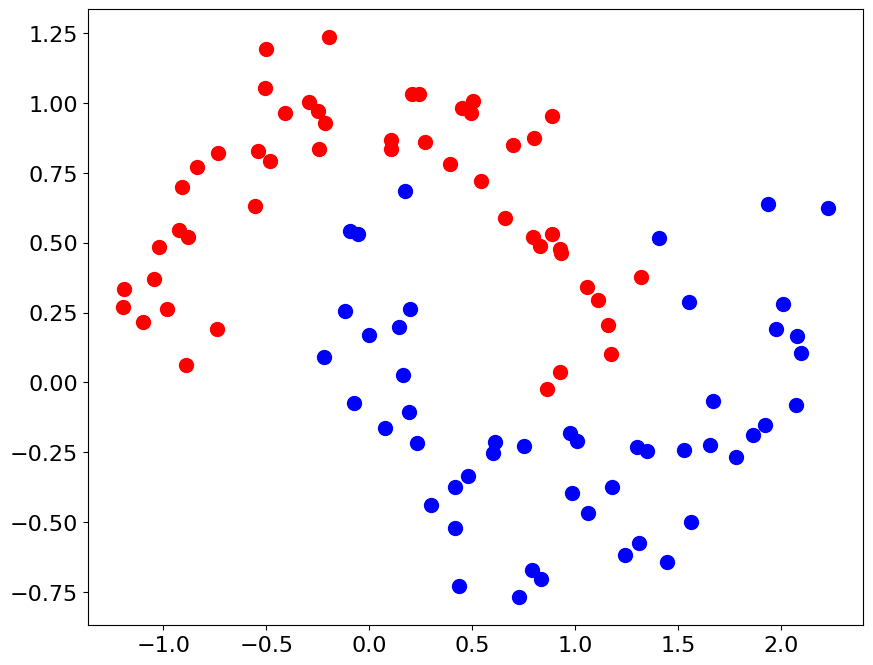

In [125]:
x, y = datasets.make_moons(noise=0.15, random_state=666)
plt.figure(figsize=(10, 8))
plt.scatter(x[y==0,0],x[y==0,1],color='red', s=100)
plt.scatter(x[y==1,0],x[y==1,1],color='blue', s=100)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [101]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

def PolynomialSVC(degree, C=1.0):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('linearSVC', LinearSVC(C=C))
    ])

poly_svc = PolynomialSVC(degree=3)
poly_svc.fit(x,y)
print(poly_svc.score(x,y))

0.96


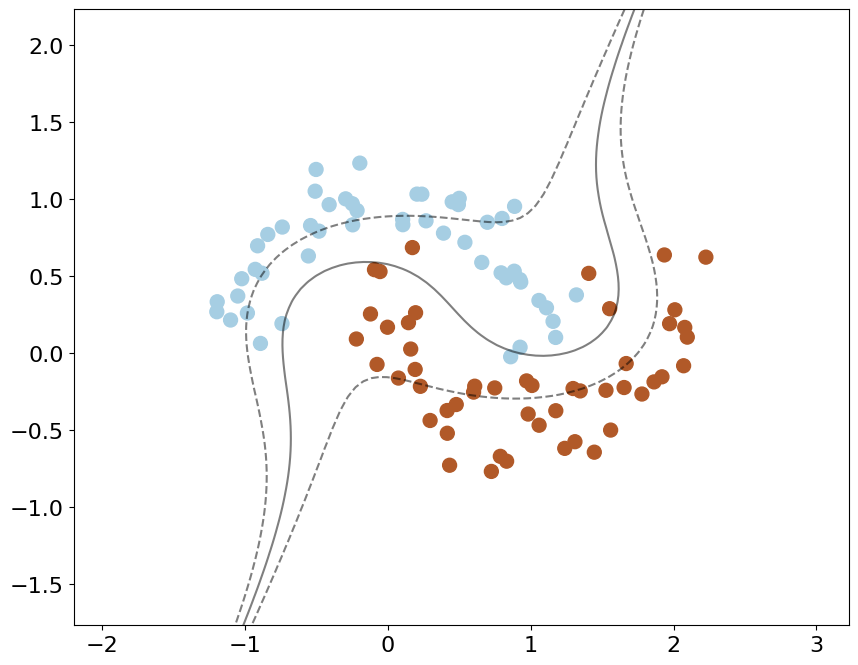

In [98]:
plot_svm_boundary(poly_svc, x, y)

0.84


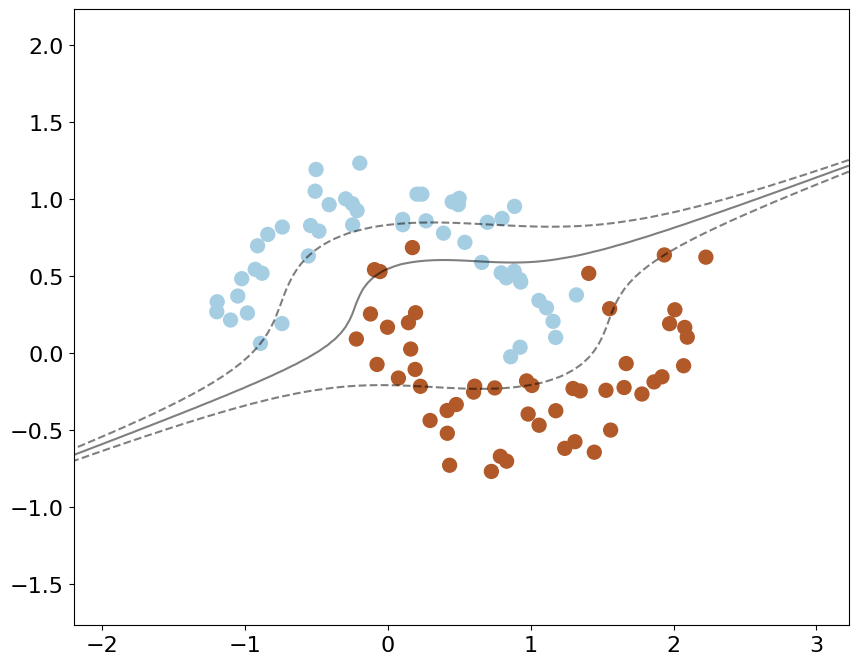

In [118]:
from sklearn.svm import SVC

def PolynomialKernelSVC(degree, C=1.0):
    return Pipeline([
        ('std_scaler', StandardScaler()),
        ('kernelSVC', SVC(kernel='poly', degree=degree, C=C))
    ])

poly_kernel_svc = PolynomialKernelSVC(degree=3)
poly_kernel_svc.fit(x,y)
print(poly_kernel_svc.score(x,y))
plot_svm_boundary(poly_kernel_svc, x, y)

0.98


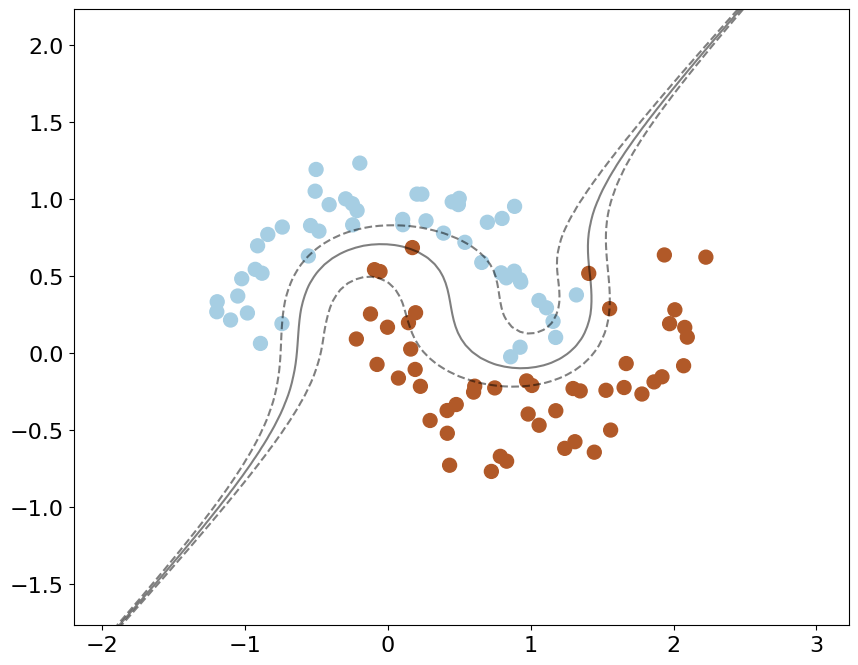

In [119]:
def PolynomialKernelSVC2(degree, C=1.0):
    return Pipeline([
        ('std_scaler', StandardScaler()),
        ('kernelSVC', SVC(kernel='poly', degree=degree, C=C, coef0=1.0, gamma=1.0))
    ])

poly_kernel_svc = PolynomialKernelSVC2(degree=3)
poly_kernel_svc.fit(x,y)
print(poly_kernel_svc.score(x,y))
plot_svm_boundary(poly_kernel_svc, x, y)

0.97


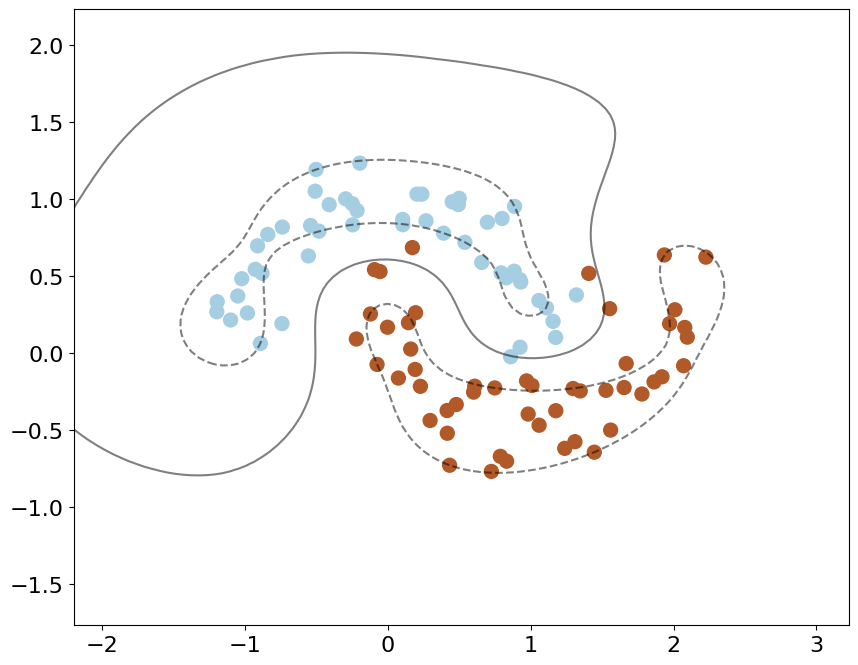

In [120]:
def RBFKernelSVC(gamma=1.0):
    return Pipeline([
        ('std_scaler', StandardScaler()),
        ('svc', SVC(kernel='rbf', gamma=gamma))
    ])

rbf_svc = RBFKernelSVC(gamma=1.0)
rbf_svc.fit(x, y)
print(rbf_svc.score(x, y))
plot_svm_boundary(rbf_svc, x, y)

1.0


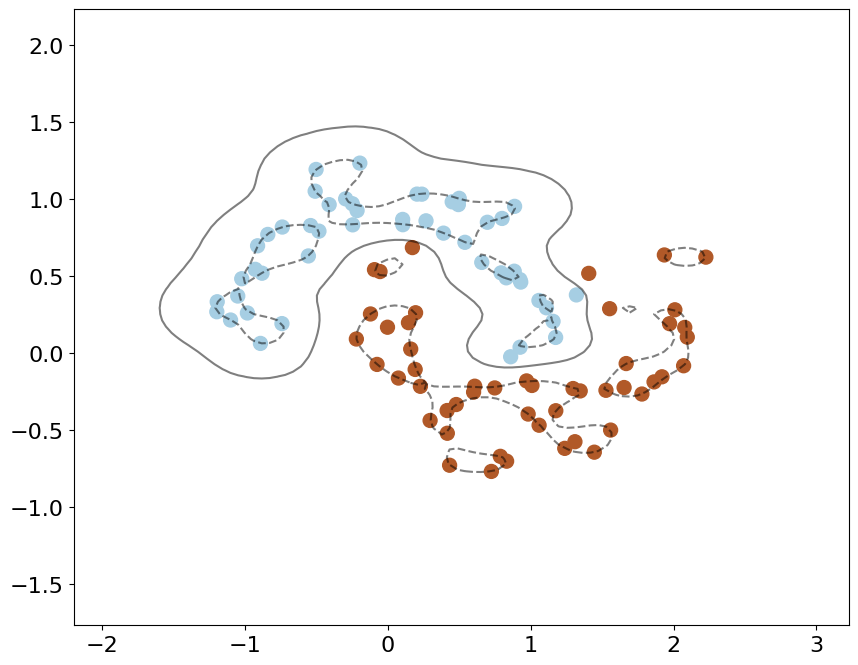

In [121]:
rbf_svc = RBFKernelSVC(gamma=10)
rbf_svc.fit(x, y)
print(rbf_svc.score(x, y))
plot_svm_boundary(rbf_svc, x, y)

0.84


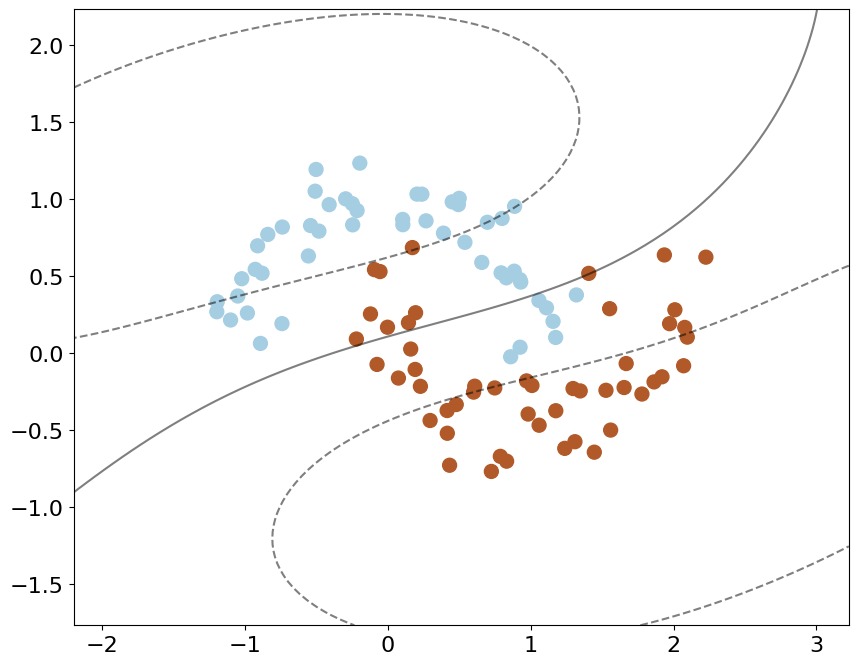

In [122]:
rbf_svc = RBFKernelSVC(gamma=0.1)
rbf_svc.fit(x, y)
print(rbf_svc.score(x, y))
plot_svm_boundary(rbf_svc, x, y)

In [141]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

diabetes = datasets.load_diabetes()
x = diabetes.data
y = diabetes.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)

(353, 10)
(89, 10)


In [146]:
from sklearn.svm import LinearSVR

def StandardLinearSVR(epsilon=0.1):
    return Pipeline([
        ('std_scaler', StandardScaler()),
        ('linearSVR', LinearSVR(epsilon=epsilon))
    ])

svr = StandardLinearSVR()
svr.fit(x_train, y_train)
print(svr.score(x_test, y_test))

0.2747012666628982
